In [24]:
# Dependencies and setup
import pandas as pd
import matplotlib.pyplot as plt

# Files to load
rent_data_load = "Apartment_List_Rent_Data_-_City_2020-7.csv"
home_value_load = "RDC_Inventory_Core_Metrics_Zip.csv"

# Read files into dataframe
rent_df = pd.read_csv(rent_data_load)
home_value_df = pd.read_csv(home_value_load) 

# Average Studio, 1, 2, 3, 4 bedroom
rent_ave = rent_df.groupby(["City"]).mean()

# Average home value of zip codes in city
home_value_ave = home_value_df.groupby(["City"]).mean()

# Merge files
rent_value_merge = pd.merge(rent_ave,home_value_ave, how="left",left_index=True,right_index=True)
rent_value_merge["June2020_Rent/Price"] = rent_value_merge['Price_2020_06']/rent_value_merge["average_listing_price"]
rent_value_merge.head()

,Price_2014_01,Price_2014_02,Price_2014_03,Price_2014_04,Price_2014_05,Price_2014_06,Price_2014_07,Price_2014_08,Price_2014_09,Price_2014_10,...,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,June2020_Rent/Price
City,,,,,,,,,,,,,,,,,,,,,
Aberdeen,1137.6,1131.2,1126.6,1131.6,1136.4,1149.6,1151.8,1159.8,1163.4,1168.8,...,260357.200000,0.022520,0.04710,89.800000,0.025660,-0.129160,0.524020,0.105920,0.323560,0.004766
Abilene,867.4,871.6,873.2,876.6,878.8,881.6,881.0,882.4,883.6,886.2,...,231615.666667,0.046317,0.07625,133.833333,0.077667,0.022767,1.073783,0.285267,0.406000,0.004052
Acworth,1091.8,1100.2,1102.2,1104.2,1111.6,1114.4,1125.4,1130.6,1130.0,1131.0,...,416096.000000,0.034050,0.11365,522.000000,0.056250,-0.142600,1.431100,0.520900,0.669250,0.002905
Addison,1206.0,1211.4,1213.4,1223.2,1228.0,1232.6,1229.2,1233.6,1243.4,1256.2,...,330277.500000,-0.010175,0.26590,62.750000,-0.005950,-0.193600,0.460375,0.066825,-0.062825,0.004089
Adelanto,1106.4,1100.6,1104.8,1103.2,1109.2,1124.8,1141.6,1149.2,1146.6,1144.0,...,251783.000000,-0.000900,0.03450,121.000000,-0.110300,-0.288200,2.361100,0.527800,1.407100,0.005699


In [48]:
rent_value_merge["1% Flag"] = rent_value_merge[rent_value_merge["June2020_Rent/Price"]>=.01]["June2020_Rent/Price"]
rent_value_merge["1% Flag"].count()

7

Text(0.5, 1.0, 'Rent/Price by US City')

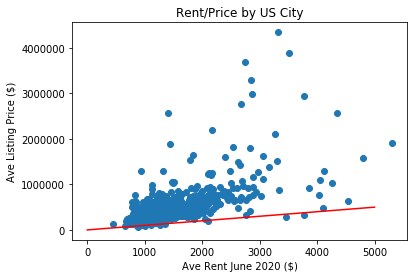

In [49]:
plt.scatter(rent_value_merge['Price_2020_06'],rent_value_merge['average_listing_price'])
plt.ylabel("Ave Listing Price ($)")
plt.xlabel("Ave Rent June 2020 ($)")

# 1% line, below are prospective
plt.plot([0,5000],[0,500000],"r")
plt.title("Rent/Price by US City")

In [51]:
# List of cities to analyze further
prospective_cities = rent_value_merge["1% Flag"].dropna()
prospective_cities

City
Calumet City    0.010897
Gary            0.010710
Gladstone       0.010342
Inkster         0.013263
Park Forest     0.012616
Pittsburg       0.012163
Union City      0.011841
Name: 1% Flag, dtype: float64